# Introduction to Pf6+

## Setup

### Running on Colab 

In [ ]:
# installing dependencies 
!pip uninstall -q -y shapely #if using locally, you need to uninstall other shapely versions first

!pip uninstall -q -y imgaug # uninstalling other 'imgaug' versions due to colab incompatibility
!pip install imgaug==0.2.5

!pip install -q shapely --no-binary shapely \
                                    cartopy \
                                    geopandas \


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Copy the data analysis functions onto colab


In [ ]:
!cp -r drive/MyDrive/data_analysis .

### Running locally 



There are some steps you need to follow before opening the notebooks to run them locally. If you haven't already, please follow these [instructions](https://gitlab.com/malariagen/gsp/pf6plus/-/tree/add_jupyter_notebooks/notebooks#running-locally).


### Import the python scripts to run the analysis

In [1]:
from data_analysis.map_samples import *
from data_analysis.plot_temporal_samples import *

## Pf6+

The Pf6+ data resource builds on the efforts of the Pf6 project (https://wellcomeopenresearch.org/articles/6-42/v1) and the GenRe project (https://www.malariagen.net/resource/29); integrating  5,970 WGS samples together with 7,626 Amplicon Sequencing samples. 

### Import Data

In [2]:
# pf6plus_metadata = 'https://pf6plus.cog.sanger.ac.uk/pf6plus_metadata.tsv'
pf6plus_metadata = '/nfs/users/nfs_k/km22/bsub_jupyter_lab/pf6plus/20210821_pf6plus_metadata.tsv' ##NEW VERSION HAS INCOMPATIBLE COUNTRY NAMES
pf6plus = pd.read_csv(pf6plus_metadata, sep='\t', index_col=0, low_memory=False)

Here we filter out the samples which have IncludeInAnalysis set to True. This will filter out only the high-quality samples. (This includes a combination of QC samples for WGS and samples “included” in the GenRe analysis for AmpSeq)

In [3]:
pf6plus=pf6plus.loc[pf6plus.IncludeInAnalysis==True]

### Working with the Pf6+ Data

You can filter out only the Pf6 samples by filtering for the WGS samples:

In [4]:
pf6plus.loc[pf6plus['Process'] == 'WGS']

,Study,Year,Country,AdmDiv1,Population,Process,IncludeInAnalysis,Latitude_country,Longitude_country,Latitude_adm1,...,PfMDR1:1034,PfMDR1:1042,PfMDR1:1226,PfMDR1:1246,PfARPS10:127,PfARPS10:128,PfFD:193,PfCRT:326,PfCRT:356,PfMDR2:484
SampleId,,,,,,,,,,,,,,,,,,,,,
FP0008-C,1147-PF-MR-CONWAY,2014,Mauritania,Hodh el Gharbi,WAF,WGS,True,20.265149,-10.337093,16.565426,...,S,N,F,D,V,D,D,N,[T/I],T
FP0009-C,1147-PF-MR-CONWAY,2014,Mauritania,Hodh el Gharbi,WAF,WGS,True,20.265149,-10.337093,16.565426,...,S,N,F,Y,V,D,D,N,T,T
FP0015-C,1147-PF-MR-CONWAY,2014,Mauritania,Hodh el Gharbi,WAF,WGS,True,20.265149,-10.337093,16.565426,...,S,N,F,D,V,D,D,N,I,T
FP0016-C,1147-PF-MR-CONWAY,2014,Mauritania,Hodh el Gharbi,WAF,WGS,True,20.265149,-10.337093,16.565426,...,S,N,F,D,V,D,D,N,I,T
FP0017-C,1147-PF-MR-CONWAY,2014,Mauritania,Hodh el Gharbi,WAF,WGS,True,20.265149,-10.337093,16.565426,...,S,N,F,D,V,D,D,N,I,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
QV0107-C,1135-PF-SN-CONWAY,2014,Senegal,Dakar,WAF,WGS,True,14.359109,-14.470363,14.754651,...,S,N,F,D,V,D,D,N,I,T
QV0108-C,1135-PF-SN-CONWAY,2014,Senegal,Dakar,WAF,WGS,True,14.359109,-14.470363,14.754651,...,S,N,F,D,V,D,D,N,I,T
QV0109-C,1135-PF-SN-CONWAY,2014,Senegal,Dakar,WAF,WGS,True,14.359109,-14.470363,14.754651,...,S,N,F,D,V,D,D,N,I,T


The plots below show the spread of data geographically for both the Pf6 and GenRe samples, and then how combining them can provide not only more samples, but a greater global coverage. Click on the icons to find out more about the data collected at each site. 

In [5]:
map_samples(pf6plus, 'Pf6')

In [6]:
map_samples(pf6plus, 'GenRe')

In [7]:
map_samples(pf6plus, 'Pf6+')

## Samples on Pf6+


### Across locations (between and within countries)

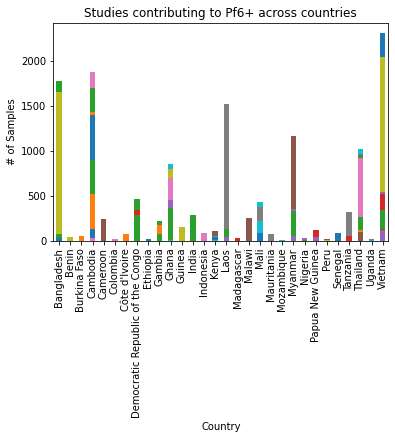

In [8]:
samples_per_country_and_study = pf6plus.groupby(['Country', 'Study']).size().unstack().fillna(0)
samples_per_country_and_study.plot.bar(stacked=True, ylabel='# of Samples', title='Studies contributing to Pf6+ across countries', legend=False)
plt.show()

### Across years 

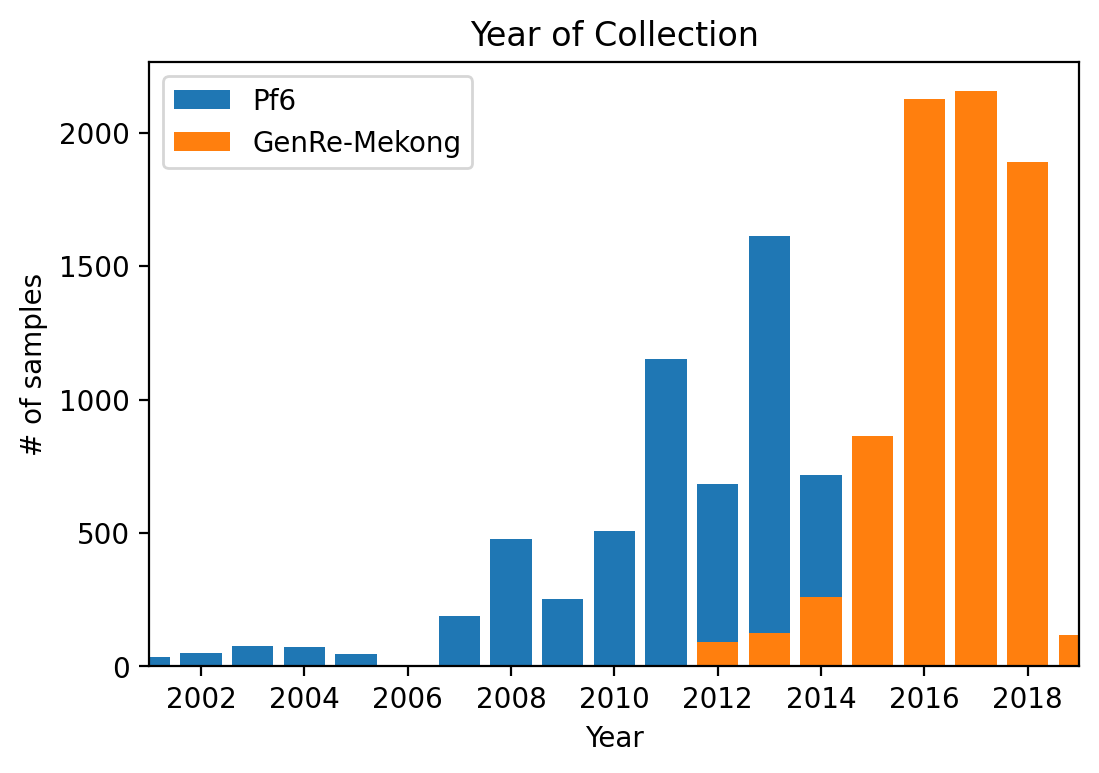

In [9]:
temporal_samples(pf6plus, 'Pf6+')

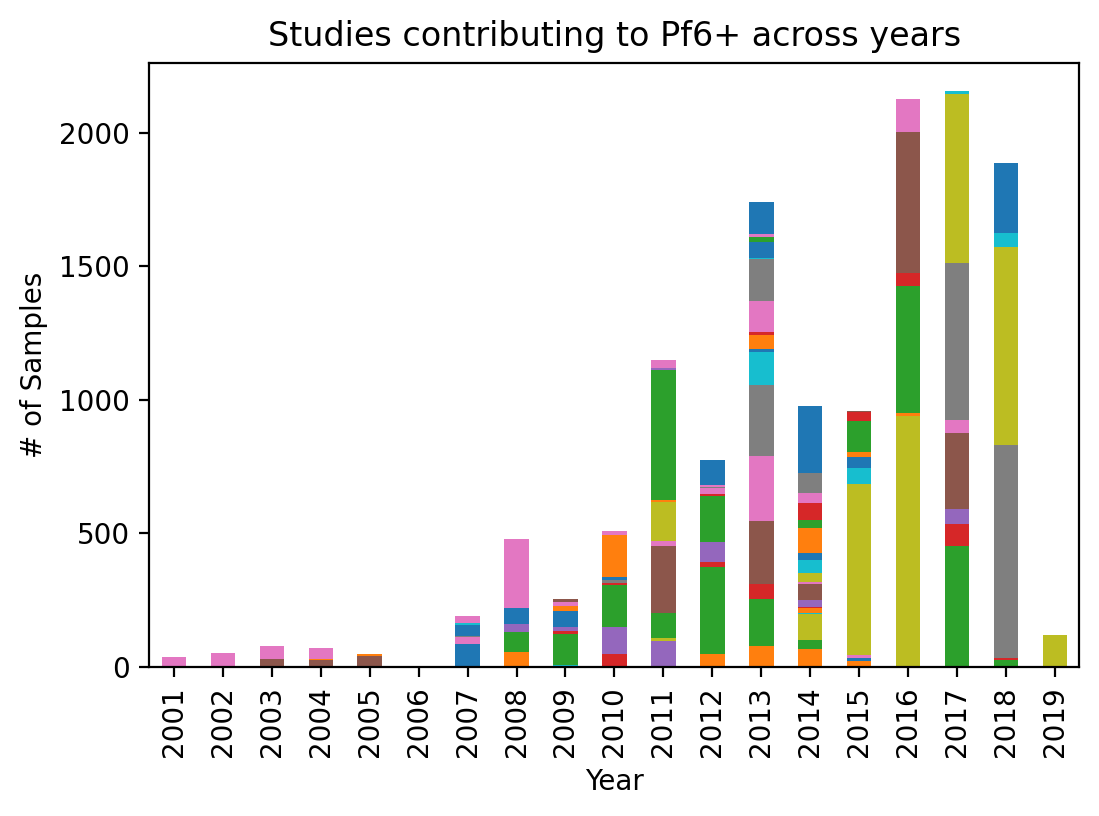

In [10]:
grouped_by_year_and_study = pf6plus.groupby(['Year', 'Study']).size().unstack().fillna(0)
grouped_by_year_and_study.plot.bar(stacked=True, ylabel='# of Samples', title='Studies contributing to Pf6+ across years', legend=False)
plt.show()

## Samples contributed to Pf6+ 

In [11]:
#studies contributing WGS samples
wgs = pf6plus.loc[pf6plus['Process'] == 'WGS'].groupby(['Country', 'Study']).size().to_frame('Number of WGS samples')
#studies contributing AmpSeq samples (any technology)
ampseq = pf6plus.loc[pf6plus['Process'] != 'WGS'].groupby(['Country', 'Study']).size().to_frame('Number of AmpSeq samples')

#all studies in Pf6+
pd.set_option('display.max_rows', 100)
all_samples = pd.concat([wgs,ampseq])
all_samples.fillna('-')

Number of WGS samples  \
Country                          Study                                                   
Bangladesh                       1031-PF-SEA-PLOWE                                  28   
                                 1052-PF-TRAC-WHITE                                 49   
Benin                            1131-PF-BJ-BERTIN                                  36   
Burkina Faso                     1004-PF-BF-OUEDRAOGO                               56   
Cambodia                         1011-PF-KH-SU                                      26   
                                 1012-PF-KH-WHITE                                    2   
                                 1031-PF-SEA-PLOWE                                 100   
                                 1044-PF-KH-FAIRHURST                              393   
                                 1052-PF-TRAC-WHITE                                375   
Cameroon                         1093-PF-CM-APINJOH                                235   
Colombia                         1023-PF-CO-ECHEVERRI-GARCIA                        16   
Côte d'Ivoire                    1100-PF-CI-YAVO                                    70   
Democratic Republic of the Congo 1052-PF-TRAC-WHITE                                108   
                                 1101-PF-CD-ONYAMBOKO                              171   
                                 1138-PF-CD-FANELLO                                 65   
Ethiopia                         1098-PF-ET-GOLASSA                                 21   
Gambia                           1006-PF-GM-CONWAY                                  73   
                                 1136-PF-GM-NGWA                                    95   
                                 1137-PF-GM-DALESSANDRO                             50   
                                 1141-PF-GM-CLAESSENS                                1   
Ghana                            1014-PF-SSA-SUTHERLAND                              2   
                                 1017-PF-GH-AMENGA-ETEGO                           365   
                                 1083-PF-GH-CONWAY                                  83   
                                 1094-PF-GH-AMENGA-ETEGO                           241   
                                 1096-PF-GH-GHANSAH                                100   
                                 1151-PF-GH-AMENGA-ETEGO                            60   
Guinea                           1026-PF-GN-CONWAY                                 149   
Indonesia                        1146-PF-MULTI-PRICE                                80   
Kenya                            1014-PF-SSA-SUTHERLAND                              1   
                                 1015-PF-KE-NZILA                                   41   
                                 1027-PF-KE-BULL                                     8   
                                 1107-PF-KEN-KAMAU                                  60   
Laos                             1008-PF-SEA-RINGWALD                               36   
                                 1052-PF-TRAC-WHITE                                 84   
Madagascar                       1102-PF-MG-RANDRIANARIVELOJOSIA                    24   
Malawi                           1022-PF-MW-OCHOLLA                                254   
Mali                             1001-PF-ML-DJIMDE                                  85   
                                 1097-PF-ML-MAIGA                                  127   
                                 1127-PF-ML-SOULEYMANE                             162   
                                 1134-PF-ML-CONWAY                                  52   
Mauritania                       1147-PF-MR-CONWAY                                  76   
Mozambique                       1014-PF-SSA-SUTHERLAND                              1   
Myanmar                          1008-PF-SEA-RINGWALD                               50   
               

### Example of other metadata

In [12]:
list(pf6plus.columns)

['Study',
 'Year',
 'Country',
 'AdmDiv1',
 'Population',
 'Process',
 'IncludeInAnalysis',
 'Latitude_country',
 'Longitude_country',
 'Latitude_adm1',
 'Longitude_adm1',
 'PfCRT',
 'Kelch',
 'PfDHFR',
 'PfEXO',
 'PGB',
 'Plasmepsin2/3',
 'PfDHPS',
 'PfMDR1',
 'Species',
 'Pf3D7_02_v3:376222',
 'Pf3D7_02_v3:470013',
 'Pf3D7_03_v3:656861',
 'Pf3D7_04_v3:110442',
 'Pf3D7_04_v3:881571',
 'Pf3D7_05_v3:350933',
 'Pf3D7_05_v3:369740',
 'Pf3D7_06_v3:900278',
 'Pf3D7_07_v3:1044052',
 'Pf3D7_08_v3:1314831',
 'Pf3D7_08_v3:413067',
 'Pf3D7_09_v3:900277',
 'Pf3D7_11_v3:1018899',
 'Pf3D7_11_v3:1815412',
 'Pf3D7_13_v3:1056452',
 'Pf3D7_13_v3:1466422',
 'Pf3D7_14_v3:137622',
 'Pf3D7_14_v3:2164225',
 'Pf3D7_01_v3:145515',
 'Pf3D7_03_v3:548178',
 'Pf3D7_04_v3:1102392',
 'Pf3D7_04_v3:139051',
 'Pf3D7_04_v3:286542',
 'Pf3D7_04_v3:529500',
 'Pf3D7_05_v3:796714',
 'Pf3D7_07_v3:1256331',
 'Pf3D7_07_v3:461139',
 'Pf3D7_07_v3:619957',
 'Pf3D7_08_v3:417335',
 'Pf3D7_09_v3:163977',
 'Pf3D7_10_v3:317581',
 'Pf3

## Partners & Funders contribution

We would like to thank all **MalariaGEN Plasmodium falciparum Community Project partners** for contributing to this resource. 

Specifically, to the: 
- Pf6 partner studies (http://ngs.sanger.ac.uk/production/malaria/pfcommunityproject/Pf6/Pf_6_partner_studies.pdf). 
- GenRe partner studies (http://ngs.sanger.ac.uk/production/malaria/Resource/29/20200705-GenRe-07-PartnerStudyInformation-0.39.pdf).